In [1]:
import pandas as pd
import numpy as np
import math

In [2]:
flag = False
elements_ = []

with open('a_example.in') as input_:
    for line in input_:
        if flag is False:
            rows, cols, min_ingredients, max_cells = line.split(' ')
            flag = True
        else:
            elements_.append(np.array(list(line.rstrip())))

In [3]:
df = pd.DataFrame(elements_)
pizza_ = df.replace(['M', 'T'], [1, 0])

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

sns.heatmap(pizza_)
plt.show()

<Figure size 640x480 with 2 Axes>

#### SETAS => 1

#### TOMATES => 0

In [5]:
def maximize_cuts(max_):
    possible_cuts = list()
    
    for i in range(max_ - 1, 0, -1):
        x_ = max_ % i
        y_ = max_ % i
        
        if x_ == 0 and y_ == 0:
            item_x = [int(max_ / i), i]
            item_y = [i, int(max_ / i)]
            if item_x not in possible_cuts:
                possible_cuts.append(item_x)
            if item_y not in possible_cuts:
                possible_cuts.append(item_y)
            
    return possible_cuts

In [6]:
def matches_condition(pizza_, values):
    tomatoes = 0
    mushrooms = 0
    
    for value in values:
        for nested in value:
            if pizza_.at[nested[0], nested[1]] == 1:
                mushrooms += 1
            elif pizza_.at[nested[0], nested[1]] == 0:
                tomatoes += 1

        if mushrooms >= int(min_ingredients) and tomatoes >= int(min_ingredients):
            return value

In [7]:
def check_cuts(x, y, min_, max_, cuts_):
    slices_ = list()
    
    for cut in cuts_:
        slice_ = list()
        invalid = False
        
        for i in range(cut[0]):
            for j in range(cut[1]):
                if x + i < pizza_.shape[0] and y + j < pizza_.shape[1]:
                    slice_.append([x + i, y + j])
                else:
                    invalid = True
                
        if invalid is False:
            slices_.append(slice_)
    
    return slices_

In [8]:
good_slices = list()
possible_cuts = maximize_cuts(int(max_cells))

for row_ in range(pizza_.shape[0]):
    for col_ in range(pizza_.shape[1]):
        if pizza_.at[row_, col_] != 5:
            slices_ = check_cuts(row_, col_, int(min_ingredients), int(max_cells), possible_cuts)
            slice_ = matches_condition(pizza_, slices_)
            if slice_ is not None:
                col_final = len(slice_)
                good_slices.append([row_, slice_[col_final - 1][0], col_, slice_[col_final - 1][1]])
                for element in slice_:
                    pizza_.at[element[0], element[1]] = 5

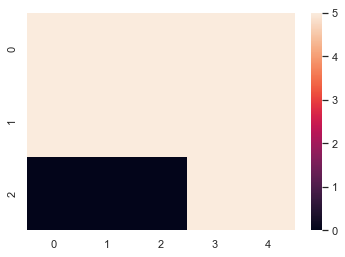

In [9]:
sns.heatmap(pizza_)
plt.show()

In [10]:
with open('example_alvaro.out', 'w') as f_:
    f_.write(str(len(good_slices)) + "\n")
    
    for value_ in good_slices:
        f_.write(str(value_[0]) + " " + str(value_[2]) + " " + str(value_[1]) + " " + str(value_[3]) + "\n")